In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import datetime
import os
from WindPy import w
import sys
%matplotlib inline

In [2]:
sys.path.append("../../website/everyday-update/")

In [3]:
import cost

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [4]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [24]:
def winde2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[str(field.lower())] = data
    return pd.DataFrame(dic, index=raw_data.Times)

In [32]:
DATA_DIR = "C:/Users/jgtzsx01/Documents/workspace/data/factor-investing"
INDEX_COMP_DIR = "D:/Data/index-component/"
STOCK_FILE = "%s/stock.xlsx"%(DATA_DIR)

In [33]:
stock_df = pd.read_excel(STOCK_FILE)

In [34]:
stock_df

,code,name
0,CI005001.WI,石油石化
1,CI005002.WI,煤炭
2,CI005003.WI,有色金属
3,CI005004.WI,电力及公用事业
4,CI005005.WI,钢铁
5,CI005006.WI,基础化工
6,CI005007.WI,建筑
7,CI005008.WI,建材
8,CI005009.WI,轻工制造
9,CI005010.WI,机械


In [35]:
codes = stock_df['code'].tolist()

In [134]:
dic = {}
for code in codes:
    df = pd.read_excel("%s/%s.xlsx"%(DATA_DIR, code), index_col=0)
    dic[code] = df
    # 每周、月调仓
    dic[code] = df.resample('M').last()
pnl = pd.Panel(dic)

In [135]:
pnl

<class 'pandas.core.panel.Panel'>
Dimensions: 29 (items) x 27 (major_axis) x 2 (minor_axis)
Items axis: CI005001.WI to CI005029.WI
Major_axis axis: 2015-01-31 00:00:00 to 2017-03-31 00:00:00
Minor_axis axis: current return to close

### 计算收益率

In [136]:
pnl.ix[:, :, "return"] = pnl.minor_xs("close").pct_change()

In [138]:
k = 1
pnl.loc[:, :, "return"] = pnl.minor_xs("close").pct_change(k) # 20个交易日年化收益率
pnl.loc[:, :, "return"] = pnl.minor_xs("return").shift(-k) # 要预测的目标收益率

In [139]:
pnl.loc[:, :, "rolling current return"] = pnl.minor_xs("current return").rolling(window=7).mean()

In [142]:
pnl["CI005001.WI"].tail()

,current return,close,return,rolling current return
2016-11-30,-0.002443,2370.6917,0.037266,-0.009629
2016-12-31,-0.006803,2459.0374,0.047940,-0.006361
2017-01-31,-0.014798,2576.9247,-0.005494,-0.007107
2017-02-28,0.002526,2562.7671,-0.016903,-0.002752
2017-03-31,-0.011660,2519.4480,NaN,-0.004911


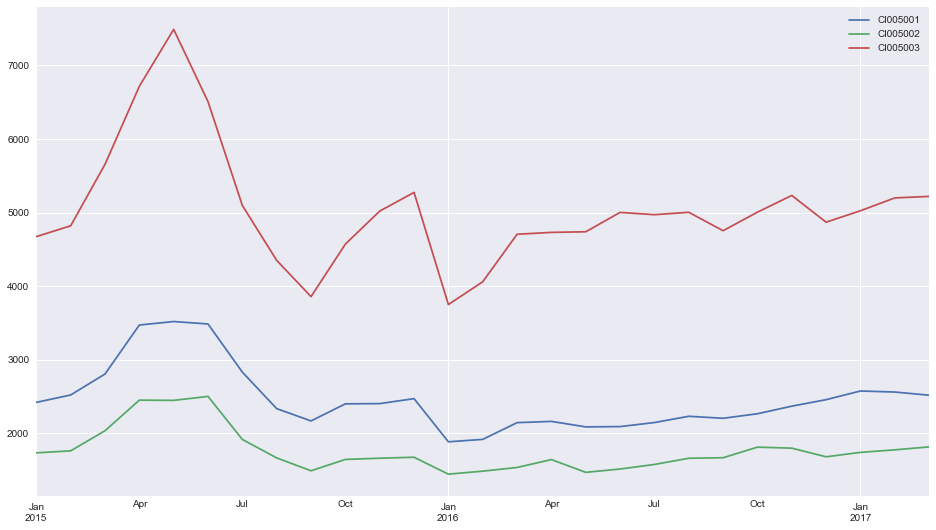

In [143]:
plt.figure(figsize=(16, 9))
pnl["CI005001.WI"]["close"].plot(label='CI005001')
pnl["CI005002.WI"]["close"].plot(label='CI005002')
pnl["CI005003.WI"]["close"].plot(label='CI005003')
plt.legend()

In [153]:
pnl["CI005001.WI"]

,current return,close,return,rolling current return
2015-01-31,-0.021662,2422.1887,0.041497,NaN
2015-02-28,0.040433,2522.7032,0.112936,NaN
2015-03-31,0.067428,2807.6077,0.237040,NaN
2015-04-30,0.010683,3473.1222,0.013668,NaN
2015-05-31,0.020890,3520.5936,-0.009485,NaN
2015-06-30,-0.128301,3487.2022,-0.187623,NaN
2015-07-31,-0.075228,2832.9212,-0.174940,-0.012251
2015-08-31,-0.161475,2337.3291,-0.071587,-0.032224
2015-09-30,-0.077497,2170.0058,0.107022,-0.049071
2015-10-31,0.009167,2402.2436,0.001379,-0.057394


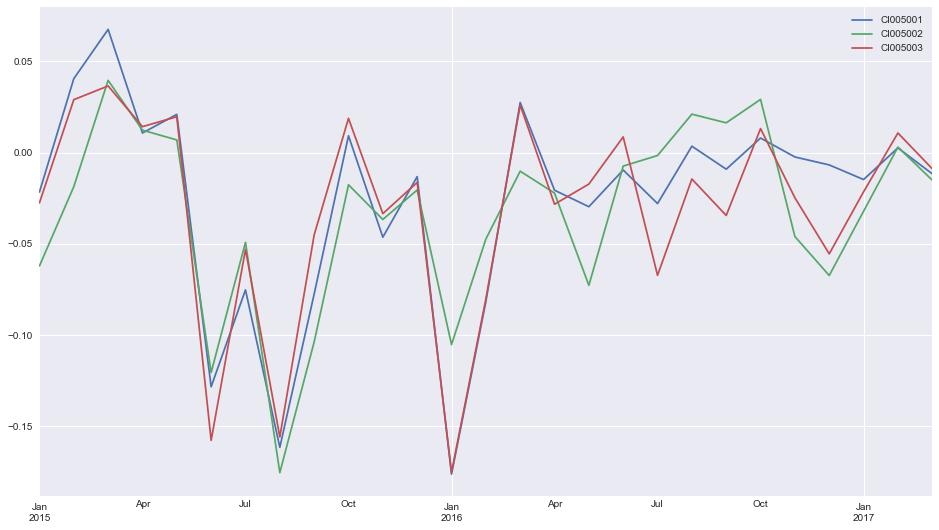

In [144]:
plt.figure(figsize=(16, 9))
pnl["CI005001.WI"]["current return"].plot(label='CI005001')
pnl["CI005002.WI"]["current return"].plot(label='CI005002')
pnl["CI005003.WI"]["current return"].plot(label='CI005003')
plt.legend()

In [145]:
n_groups = 5
dates = pnl.major_axis
every_group = np.ceil(len(pnl.items) * 1.0 / n_groups)
start_date = "2016-03-01"
dates = pnl["CI005001.WI"][pnl["CI005001.WI"].index >= start_date].index

In [146]:
group_df = pd.DataFrame(index=dates, columns=range(1, n_groups+1))
for date in dates:
    df = pnl.major_xs(date).T
    # 按当前浮盈/浮亏收益率从大到小排序，
    # 收益率高的说明当前价格远高于成本，收益低的说明当前价格远低于成本
    df.sort_values(by="current return", inplace=True, ascending=False) 
    # 分组
    df["rank"] = range(1, df.shape[0]+1)
    df["rank"] = np.ceil(df["rank"] / every_group)
    # 得到每组平均收益
    group_df.loc[date, :] = df.groupby("rank")["return"].mean()

In [147]:
res = group_df.mean()
data = pd.DataFrame({'group': res.index, 'return': res.values})

In [148]:
win, loss = (group_df[n_groups-1]>0).sum(), (group_df[n_groups-1]<0).sum()
print win, loss, "%.2f%%"%((win*100/(win+loss)))

8 4 66.00%


In [150]:
group_df

,1,2,3,4,5
2016-03-31,-0.0257948,-0.0139897,-0.0339089,-0.0202967,0.0115051
2016-04-30,-0.0065623,-0.0363445,-0.0300178,-0.00122556,-0.00391165
2016-05-31,0.0532408,0.0334106,0.0597551,0.0052216,0.0187019
2016-06-30,0.0121384,-0.00762485,0.00243978,0.0152228,0.0278767
2016-07-31,0.0363484,0.0485798,0.0586465,0.0378121,0.0308915
2016-08-31,-0.0108081,-0.00694363,-0.0179943,-0.0155135,-0.0321768
2016-09-30,0.0270434,0.0327656,0.034046,0.0417292,0.0303385
2016-10-31,0.0338625,0.0317158,0.0400264,0.0475832,0.0144444
2016-11-30,-0.0507566,-0.0387975,-0.0473246,-0.0543296,-0.0524985
2016-12-31,0.00697784,0.00466699,-0.0107013,0.0041046,-0.0215836


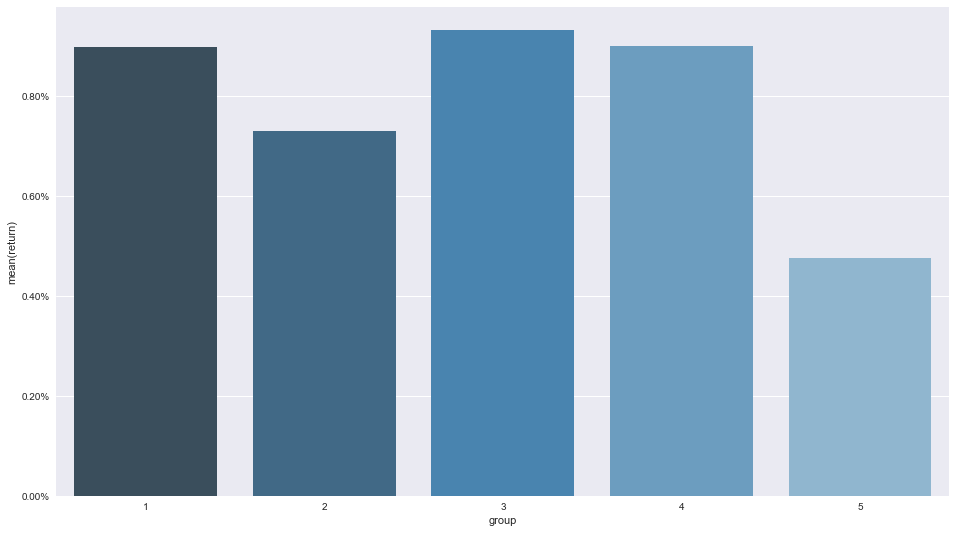

In [149]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x='group', y='return', data=data, palette="Blues_d")
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])